In [1]:
import re
import keras
import numpy as np
import pandas as pd
from tqdm import tqdm
import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline

Using TensorFlow backend.


In [2]:
ENCODED_DATA_DIR = {
    'bottlenecks': 'out/bottlenecks',
    'dimensions': 'out/dimensions'
}

MODEL_FILE = 'out/same-artist-2b@83.943.h5'

In [3]:
# create sample from bottlecks and aspects of a pair of images
def get_sample(fid):
    bottleneck = np.fromfile(ENCODED_DATA_DIR['bottlenecks'] + '/' + str(fid), dtype=np.float32)
    dims = np.fromfile(ENCODED_DATA_DIR['dimensions'] + '/' + str(fid), dtype=np.float32)
    return bottleneck, dims

# create feature vector for a pair of fids
def get_pair_feature(fid1, fid2):
    s1 = get_sample(fid1)
    s2 = get_sample(fid2)
    feature = np.concatenate((
            [s1[1][0] / s1[1][1]], # image 1 AR  x1
            [s2[1][0] / s2[1][1]], # image 2 AR  x1
            s1[0], # image 1 features            x2048
            s2[0] # image 2 features             x2048
        )).astype(np.float32)
    return feature

In [4]:
# load submission info
test_df = pd.read_csv('submission_info.csv', index_col='index')
# convert image filenames to fids
test_df['image1'] = [int(re.findall(r'(\d+).jpg$', x)[0]) for x in test_df['image1']]
test_df['image2'] = [int(re.findall(r'(\d+).jpg$', x)[0]) for x in test_df['image2']]

In [5]:
# load model
model = keras.models.load_model(MODEL_FILE)

In [6]:
# create dataframe for submission
subm_df = pd.DataFrame({'index': np.array([], dtype=np.int64), 'sameArtist': np.array([], dtype=np.float32)})
subm_df = subm_df.set_index('index')

In [7]:
N = 250000 # samples per batch
batch_no = 0
batch_features = []
batch_test_indexes = []

In [ ]:
def dump_batch():
    global batch_test_indexes
    global batch_features
    global batch_no
    global subm_df
    global N
    
    batch_no = batch_no + 1
    
    y_p = model.predict(
        np.array(batch_features),
        verbose=False
    )

    batch_df = pd.DataFrame({
        'index': batch_test_indexes,
        'sameArtist': y_p.T[0]
    })
    
    batch_df = batch_df.set_index('index')
    subm_df = subm_df.append(batch_df)
    
    batch_features = []
    batch_test_indexes = []

In [ ]:
for row in tqdm(test_df.iterrows()):
    test_index = int(row[0])
    fid1 = row[1]['image1']
    fid2 = row[1]['image2']
    
    batch_test_indexes.append(test_index)
    batch_features.append(get_pair_feature(fid1, fid2))
#     batch_features.append(get_pair_feature(fid2, fid1))
      
    if len(batch_test_indexes) == N: 
        dump_batch()

if len(batch_test_indexes) > 0: dump_batch()
    
del batch_test_indexes
del batch_features

21916047it [2:48:34, 2166.90it/s]


In [ ]:
subm_df.to_csv('submission-b.csv', index=True)

In [ ]:
# for i in tqdm(range(22)):
#     d = {'index': [], 'sameArtist': []}
    
#     for j in range(1000000):
#         d['index'].append(int(i*1000000+j))
#         d['sameArtist'].append(0.5)
        
#     df = pd.DataFrame(d, )
#     df = df.set_index('index')
#     subm_df = subm_df.append(df)

(array([ 4543954.,  2681919.,  1951630.,  1524433.,  1258052.,  1076460.,
          947707.,   842788.,   762416.,   699499.,   642351.,   593697.,
          548566.,   509763.,   474154.,   439510.,   406787.,   376967.,
          346916.,   318025.,   288610.,   259193.,   220786.,   150799.,
           51065.]),
 array([  4.70453301e-07,   3.99903212e-02,   7.99801720e-02,
          1.19970023e-01,   1.59959874e-01,   1.99949724e-01,
          2.39939575e-01,   2.79929426e-01,   3.19919277e-01,
          3.59909127e-01,   3.99898978e-01,   4.39888829e-01,
          4.79878680e-01,   5.19868531e-01,   5.59858381e-01,
          5.99848232e-01,   6.39838083e-01,   6.79827934e-01,
          7.19817784e-01,   7.59807635e-01,   7.99797486e-01,
          8.39787337e-01,   8.79777188e-01,   9.19767038e-01,
          9.59756889e-01,   9.99746740e-01]),
 <a list of 25 Patch objects>)

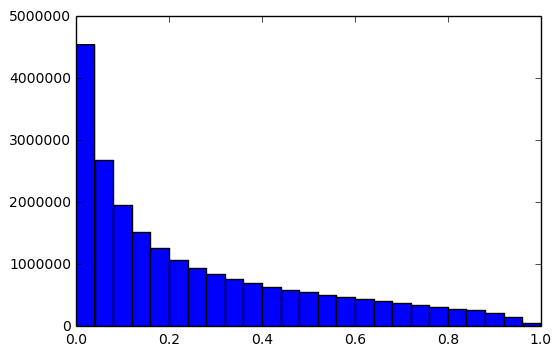

In [13]:
plt.hist(subm_df['sameArtist'].values, bins=25)

In [11]:
subm_df

,sameArtist
index,
0,0.027969
1,0.136686
2,0.414421
3,0.110824
4,0.591226
5,0.094225
6,0.867577
7,0.582300
8,0.513234


In [14]:
s2 = subm_df.copy()

In [16]:
s2['sameArtist'] = [1. if x > 0.5 else 0 for x in s2['sameArtist']]

In [17]:
s2

,sameArtist
index,
0,0.0
1,0.0
2,0.0
3,0.0
4,1.0
5,0.0
6,1.0
7,1.0
8,1.0


(array([ 17806090.,         0.,         0.,         0.,         0.,
                0.,         0.,         0.,         0.,   4109957.]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 10 Patch objects>)

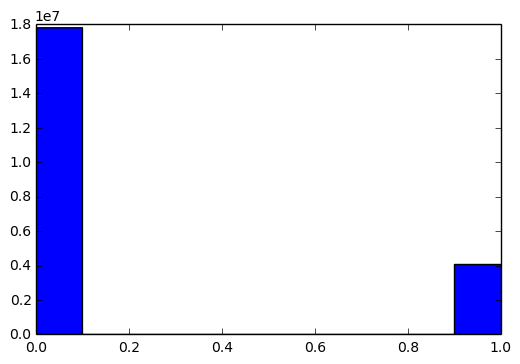

In [18]:
plt.hist(s2['sameArtist'].values, bins=10)

In [19]:
s2.to_csv('submission-b-clamped.csv', index=True)